#Importing datasets and libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd gdrive/My \Drive/RegressionTask/

/content/gdrive/My Drive/RegressionTask


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('Admission_Predict.csv', index_col='Serial No.')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


#Visualizing Trends

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df.columns = [c.replace(' ', '_') for c in df.columns]
#it is hard to work if the column names contain spaces xD

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR_               400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance_of_Admit_   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


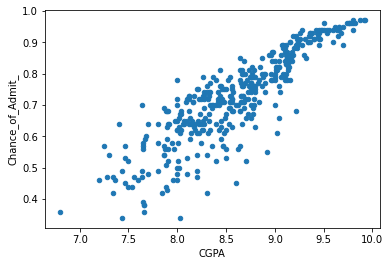

In [0]:
df.plot.scatter(x = 'CGPA', y='Chance_of_Admit_')

## **Insights Drawn from the plot**
### The chances of admission increase with n increase in CGPA.
### This increase occurs in an approximately linear fashion with respect to the CGPA obtained.
### It is possible to fit a straight line through the data
### It can be guessed that the straight line passing through the data would not pass through the origin but would have a positive x intercept. This means that below a certain CGPA, there is little or no chance to get admitted to an institute going by this data
### Though the distribution can be approximated as a straight line there is substantial amount of spread, that indicates that CPI is not the only criteria for admission (sounds fair, we have other columns such as SOP LOR)

# Part 2

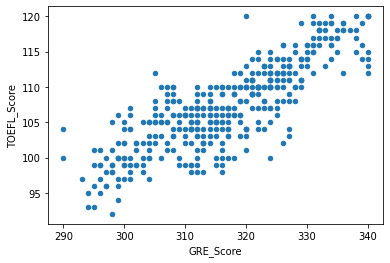

In [0]:
# plot the GRE score against the TOEFEL score to see trends
df.plot.scatter(x='GRE_Score', y='TOEFL_Score')

In [0]:
print("The mean GRE Score is ", df.GRE_Score.mean())
print("The mean TOEFL Score is", df.TOEFL_Score.mean())

The mean GRE Score is  316.8075
The mean TOEFL Score is 107.41


## **INSIGHTS**
### The distribution shows that as the GRE score increases the TOEFL score also increases.
### We shall start by trying to fit a linear model to the distribution.

In [0]:
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

In [0]:
#the GRE scores are our X features9used to predict the y values)
feature_x = np.array(df['GRE_Score'])
feature_x = feature_x.reshape(-1, 1)
#WE ARE NOT NORMALIZING THE FEATURE AS THERE IS ONLY ONE X FEATURE SO IT IS NOT REQUIRED


In [0]:
#feature y is the TOEFL score
feature_y = np.array(df['TOEFL_Score'])

###Splitting data into train and test parts

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(feature_x, feature_y, test_size=0.2, random_state=0)

In [0]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(320, 1) (320,) (80, 1) (80,)


In [19]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
predicted_y=model.predict(X_test)
print(predicted_y)

[104.02131968 103.5845222  111.44687694 102.71092722 107.07890208
 104.02131968 105.33171214 105.33171214 114.06766186 113.63086437
 100.09014231 114.50445934 108.82609203 100.96373728 112.32047191
 104.89491465 105.33171214 112.7572694  106.6421046  105.76850962
 112.7572694  111.88367443 100.52693979  97.90615488 108.82609203
 100.52693979  98.34295237 106.20530711 115.8148518  106.20530711
 105.33171214 110.13648448 105.33171214  98.34295237 111.01007945
 111.88367443 107.95249705 110.13648448 103.14772471 114.50445934
 109.699687   106.20530711 109.26288951 110.57328197 108.82609203
 109.699687   106.6421046  103.14772471 102.71092722 101.83733225
 104.89491465 111.01007945 107.07890208 114.94125683 104.89491465
 110.57328197 114.94125683 111.01007945 109.699687   109.699687
 106.20530711  97.46935739 106.20530711  98.77974985 110.13648448
 110.57328197 108.82609203 113.19406688 111.44687694 108.82609203
 103.5845222  111.88367443 107.95249705 105.33171214 116.68844677
 104.8949146

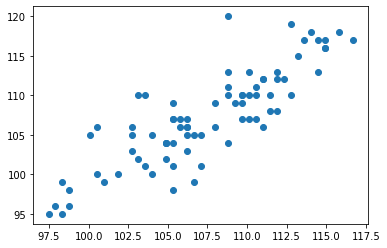

In [21]:
plt.scatter(predicted_y, y_test)

In [22]:
# print the score of our simple linear regression model
print(model.score(X_test, y_test))

0.715068729308443


We have 0.71 accuracy from our basic linear regression model

In [0]:
#Leave cross validation for now 

# Polynomial Regression



In [0]:
from sklearn.preprocessing import PolynomialFeatures


In [0]:
poly = PolynomialFeatures(degree=2)
Xpoly = poly.fit_transform(X_train)
model.fit(Xpoly, y_train)
Xtestpoly= poly.fit_transform(X_test)
predicted_y = model.predict(Xtestpoly)

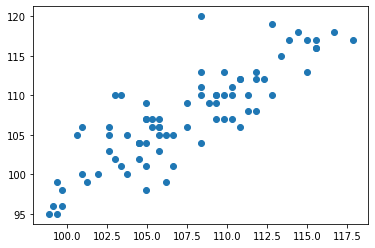

In [35]:
plt.scatter(predicted_y, y_test)

In [36]:
print(model.score(Xtestpoly, y_test))

0.7164166385890313


# **Making the model into an executable one**

In [72]:
# We shall write the model to a python file and we could get the predicted values using this
%%writefile script.py
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import sys

def getfile(file):
  df = pd.read_csv(file)
  df.columns = [c.replace(' ', '_') for c in df.columns]
  return df

def result(model, test):
  output = model.predict(test)
  return output.astype('int64')

def makemodel(train_x, train_y):
  model = linear_model.LinearRegression()
  model.fit(train_x, train_y)
  return model

def get_data(df):
  feature_x = np.array(df['GRE_Score'])
  feature_x = feature_x.reshape(-1, 1)
  poly = PolynomialFeatures(degree=2)
  Xpoly = poly.fit_transform(feature_x)

  return Xpoly


if __name__ == '__main__':
  train_file = str(sys.argv[1])
  test_file = str(sys.argv[2])
  train_df = getfile(train_file)
  test_df = getfile(test_file)
  train_x = get_data(train_df)
  test_x = get_data(test_df)
  train_y = np.array(train_df['TOEFL_Score'])
  test_y = np.array(test_df['TOEFL_Score'])
  model = makemodel(train_x, train_y)
  output = result(model, test_x)
  print(output)
  outframe = pd.DataFrame(data = output, columns = ['Prdct_TOEFL_Score'])
  outframe.to_csv(str(sys.argv[3]))
  print("The score of the model was ", model.score(test_x, test_y))

  



Overwriting script.py


In [114]:
!python3 script.py Admission_Predict.csv Admission_Predict.csv pop.csv

[117 110 106 109 105 113 108 103 101 109 110 111 112 102 104 105 107 107
 107 101 104 110 112 115 116 119 109  99  98 104 100 111 117 119 113 108
 100 100 101 102 103 106 105 114 111 109 112 118 108 111 105 104 115 110
 109 108 106  99 100 104 103 102 101 106 110 110 111 106 107 112 114 116
 108 105 105 112 111 100  99  98 104 119 108 109 119 107 106 107 105 106
 107 100  99 100 101 101 102 113 114 109 109 104 105 107 111 106 112 117
 113 101 102 108 100 108 104 104 100  97  99 111 116 115 104 103 100 100
 109 107 111 115 118 101 103 109 115 105 104 106 111 107 112 114 113 119
 110 108 106 111 118 104 115 114 108 110 111 104 106 103 102  99 106  99
 107 107 112 109 101 105  98 104 104 115 109 109 108 108 112 107 103 102
 100 102 100 105 106 111 107 116 113 110 110 109 109 116 106 102 102 104
 104 105 107 106 119 115  99  98 106 104 102 100 110 112 117 115 113 113
 109 108 110 104 105 106 110 103 102  99 102 104 107 110 105 107 104 101
 113 111 110 112 104 100  99 107 110 110 105 112 10

In [40]:
df.GRE_Score.max()

340

In [54]:
df.GRE_Score.min()

290

In [0]:
X = np.empty([20, 1], dtype=int)
# numbs = randint(20, 290, 340)
for i in range(19):
  X[i, 0] = randint(0, 1) + 2*i+4+290

In [0]:
X_ = poly.fit_transform(X)
Y = model.predict(X_)

In [0]:
X = X.ravel()
net_arr = np.zeros([20,2], dtype=int)
net_arr[:, 0] = X
net_arr[:, 1] = Y.astype('int64')

In [141]:
data = pd.DataFrame(data = net_arr, columns=['GRE Score', 'TOEFL Score'])
print(data)

    GRE Score  TOEFL Score
0         295           99
1         296           99
2         298           99
3         301          100
4         302          101
5         305          102
6         307          102
7         308          103
8         311          104
9         313          105
10        315          106
11        317          107
12        319          107
13        320          108
14        323          109
15        325          110
16        326          111
17        328          112
18        330          113
19        168          335


In [0]:
data.loc[19, 'GRE Score'] = 335
data.loc[19, 'TOEFL Score'] = 122
data.to_csv('test_data.csv')


In [0]:
from random import randint 
from random import seed
seed(1)

In [145]:
print(data)

    GRE Score  TOEFL Score
0         295           99
1         296           99
2         298           99
3         301          100
4         302          101
5         305          102
6         307          102
7         308          103
8         311          104
9         313          105
10        315          106
11        317          107
12        319          107
13        320          108
14        323          109
15        325          110
16        326          111
17        328          112
18        330          113
19        335          122
